# Dollar movement with twin deficits 

In [74]:
from prelude import *

In [75]:
df = fred_reader_multi({
    'trade_deficit': 'BOPGSTB',
    'gov_deficit': 'MTSDS133FMS'
})
df.insert(0, 'twin_deficit', df.trade_deficit + df.gov_deficit)

In [53]:
twi_start_date = datetime.datetime(1992, 12, 1)
twi_dollar_major = fred_reader_series('DTWEXM')[twi_start_date:]
dxy = yahoo_reader('DX-Y.NYB').Close[twi_start_date:]

qdf = df.resample('Q').sum()
# normalize to million and align time with deficit data
billion_to_million = 1_000_000_000 / 1_000_000
qgdp = fred_reader('GDP').shift(3, 'M').GDP * billion_to_million
# Quarterly reading, Seasonally Adjusted Annual Rate
qdf.insert(0, 'quarterly_annual_GDP', qgdp)
qdf = qdf.dropna()
qdf.insert(2, 'twin_deficit_annual_adjusted', qdf.twin_deficit.rolling(4).sum())
qdf.insert(2, 'twin_deficit_pct_GDP', qdf.twin_deficit_annual_adjusted / qdf.quarterly_annual_GDP * 100.0)
qdf = qdf.dropna()

In [54]:
qdf

,quarterly_annual_GDP,twin_deficit,twin_deficit_pct_GDP,twin_deficit_annual_adjusted,trade_deficit,gov_deficit
DATE,,,,,,
1992-12-31,6680803.0,-133556.0,-5.481362,-366199.0,-13091.0,-120465
1993-03-31,6729459.0,-76899.0,-4.785526,-322040.0,-14244.0,-62655
1993-06-30,6808939.0,-35790.0,-4.693683,-319590.0,-17743.0,-18047
1993-09-30,6882098.0,-73132.0,-4.640692,-319377.0,-18994.0,-54138
1993-12-31,7013738.0,-110837.0,-4.229670,-296658.0,-19329.0,-91508
...,...,...,...,...,...,...
2019-06-30,21329877.0,-208150.0,-7.160421,-1527309.0,-152210.0,-55940
2019-09-30,21540325.0,-386930.0,-7.381207,-1589936.0,-149658.0,-237272
2019-12-31,21747394.0,-486351.0,-7.352187,-1598909.0,-129759.0,-356592


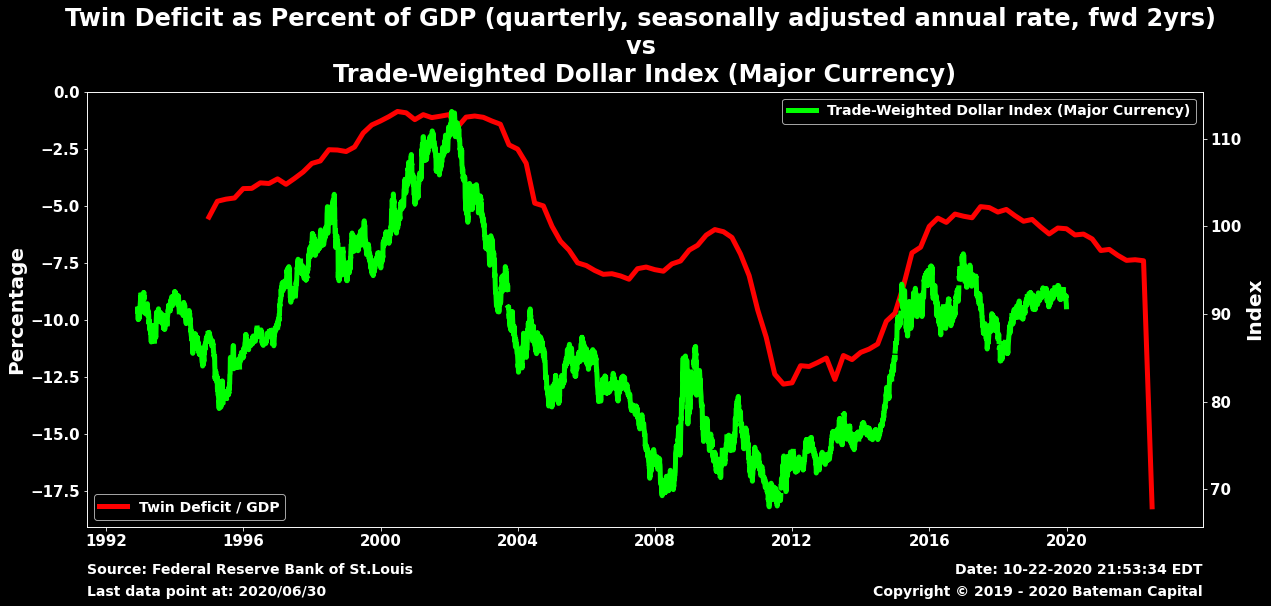

In [55]:
def plot_deficit_vs_dollar(dollar, dollar_label):
    fig, ax = plt.subplots()
    # forward 2 years
    ax.plot(qdf.twin_deficit_pct_GDP.shift(8, freq='Q'), label='Twin Deficit / GDP', color='red')
    ax.legend(loc='lower left')
    ax.set_ylabel('Percentage')
    ax2 = ax.twinx()
    ax2.plot(dollar,
             label=dollar_label,
             color='lime')
    ax2.set_ylabel('Index')
    ax2.legend(loc='upper right')
    add_source(ax, 'Federal Reserve Bank of St.Louis')
    plt.title('Twin Deficit as Percent of GDP (quarterly, seasonally adjusted annual rate, fwd 2yrs) \nvs \n{}'.format(dollar_label))
    last = qdf.index[-1]
    plt.text(0, -0.15, 'Last data point at: ' + last.strftime('%Y/%m/%d'),
          horizontalalignment='left',
          verticalalignment='center',
          fontsize=14,
          transform = ax.transAxes)

plot_deficit_vs_dollar(twi_dollar_major, 'Trade-Weighted Dollar Index (Major Currency)')

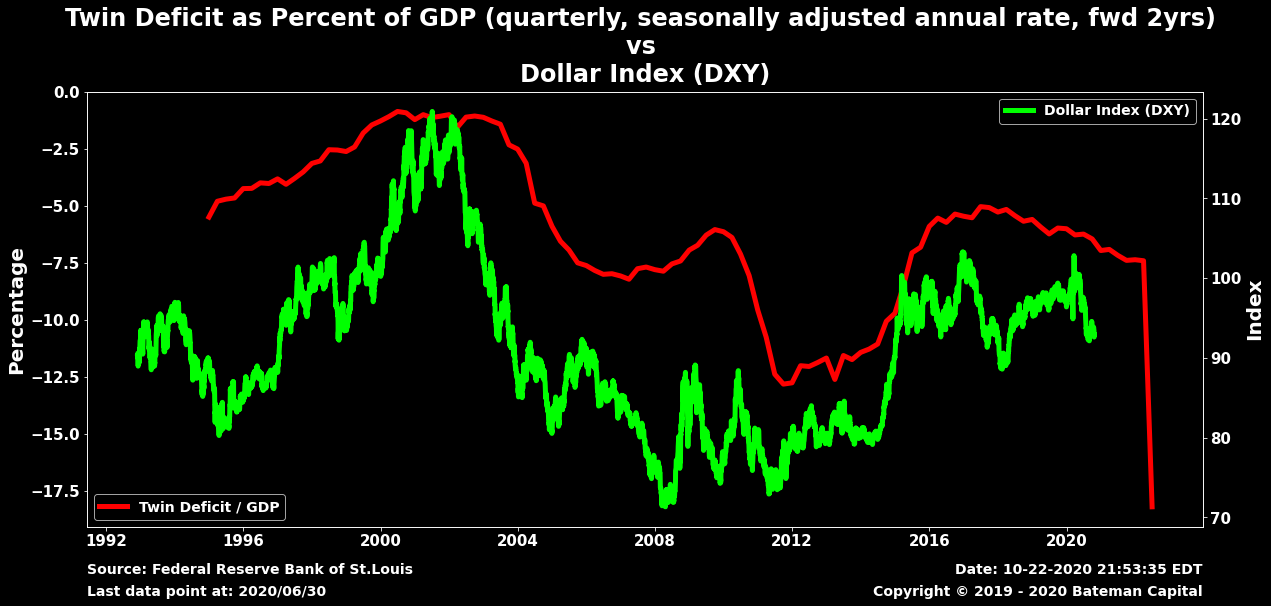

In [56]:
plot_deficit_vs_dollar(dxy, 'Dollar Index (DXY)')

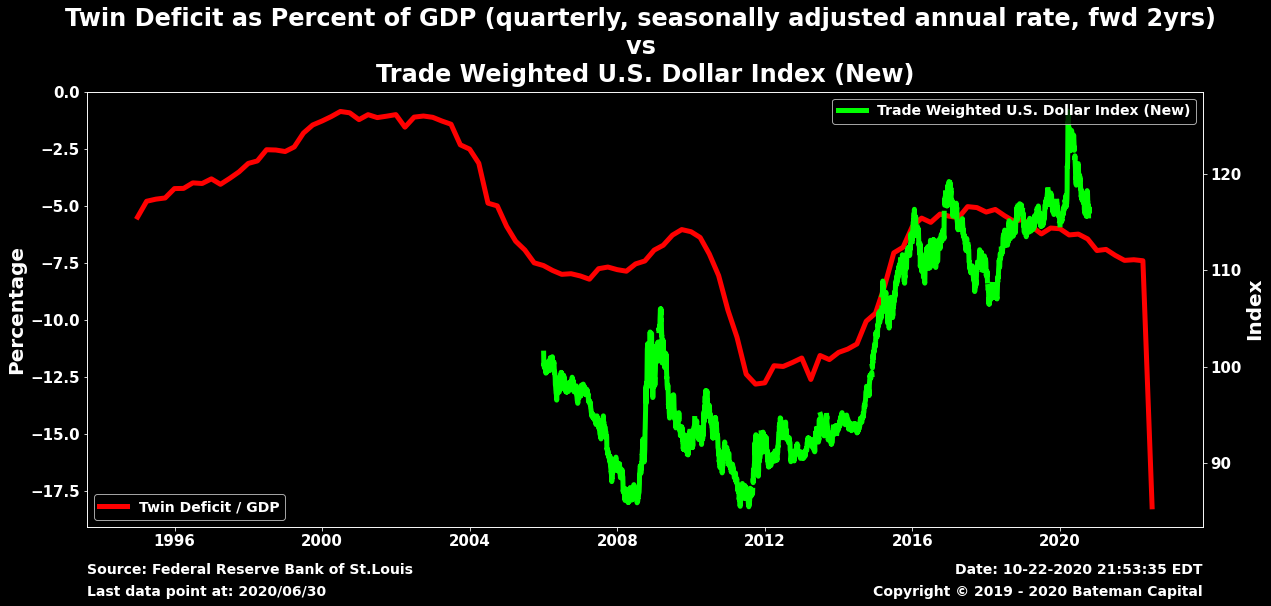

In [57]:
twi_new = fred_reader_series('DTWEXBGS')
plot_deficit_vs_dollar(twi_new, 'Trade Weighted U.S. Dollar Index (New)')

In [66]:
def compare_twi(s):
    fig, ax = plt.subplots()
    ax.invert_yaxis()
    ax.plot(twi_new, label='TWI', color='lime')
    ax.set_ylabel('Index')
    ax2 = ax.twinx()
    ax2.set_ylabel('$')
    sp = yahoo_reader(s).Close[twi_new.index[0]:]
    sn = '$' + s
    ax2.plot(sp, label=sn, color='orange')
    plt.title('Trade-weighted Dollar Index (inverted) vs {}'.format(sn))
    add_source(ax, 'Yahoo Finance, Federal Reserve Bank of St.Louis')
    ax2.legend(loc='upper right')

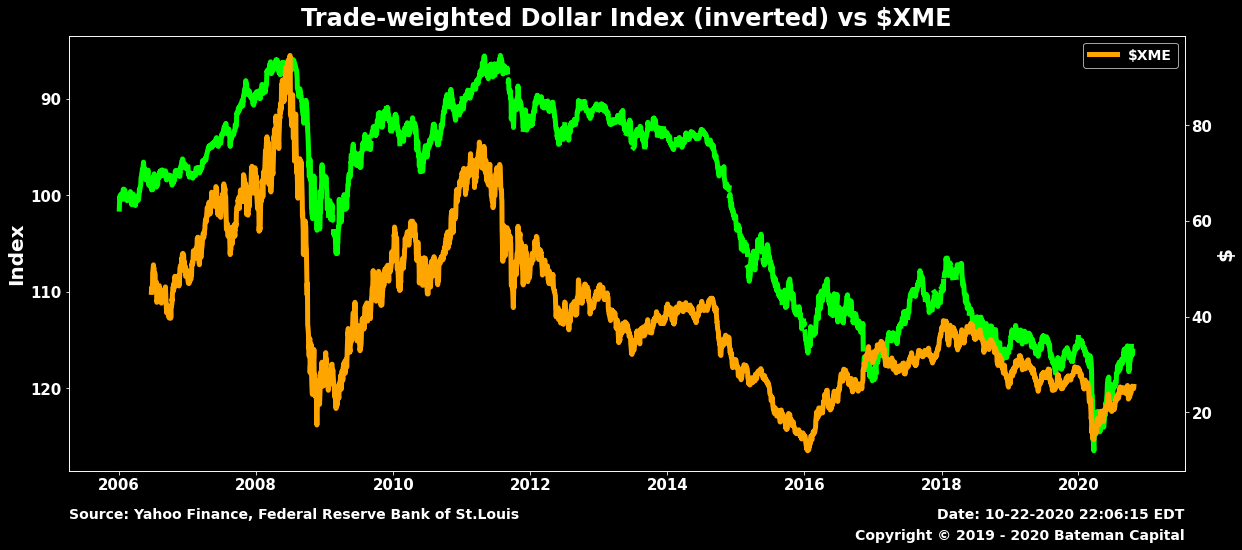

In [67]:
compare_twi('XME')

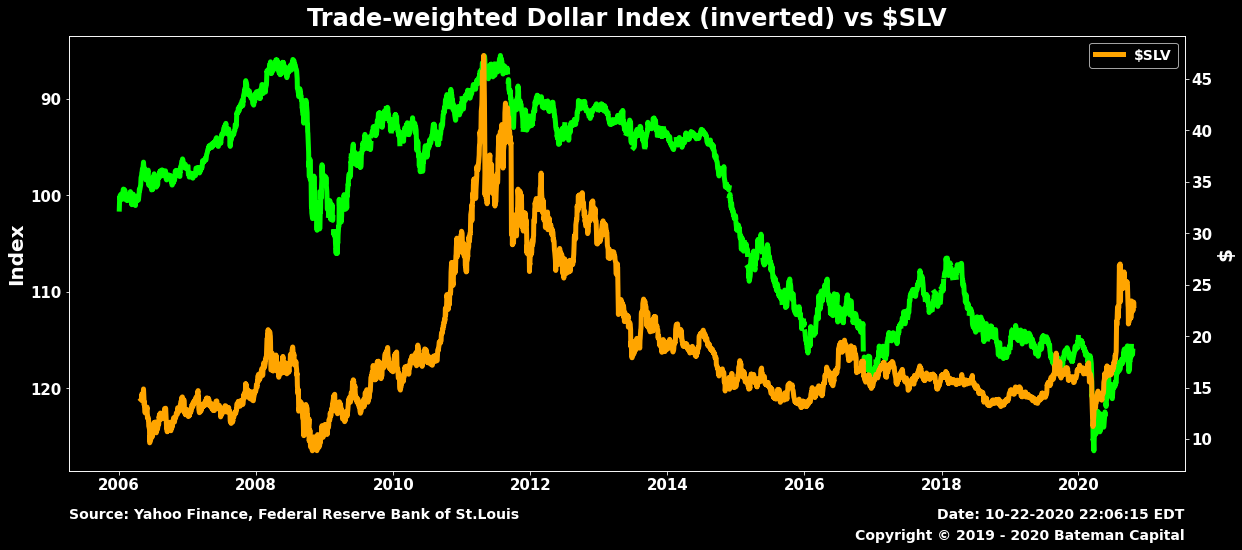

In [68]:
compare_twi('SLV')

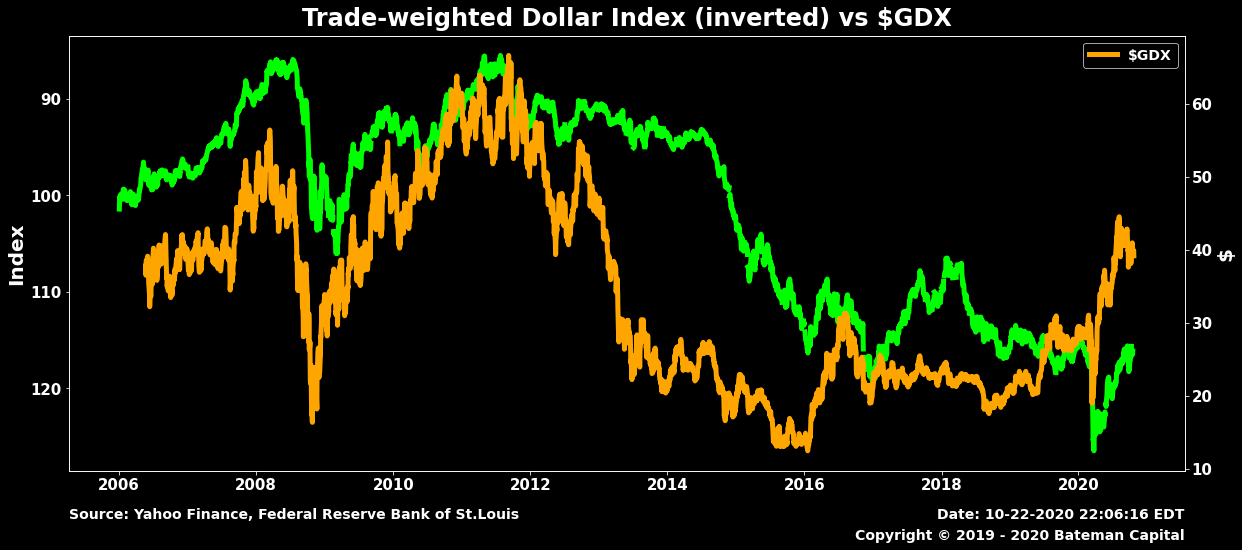

In [69]:
compare_twi('GDX')

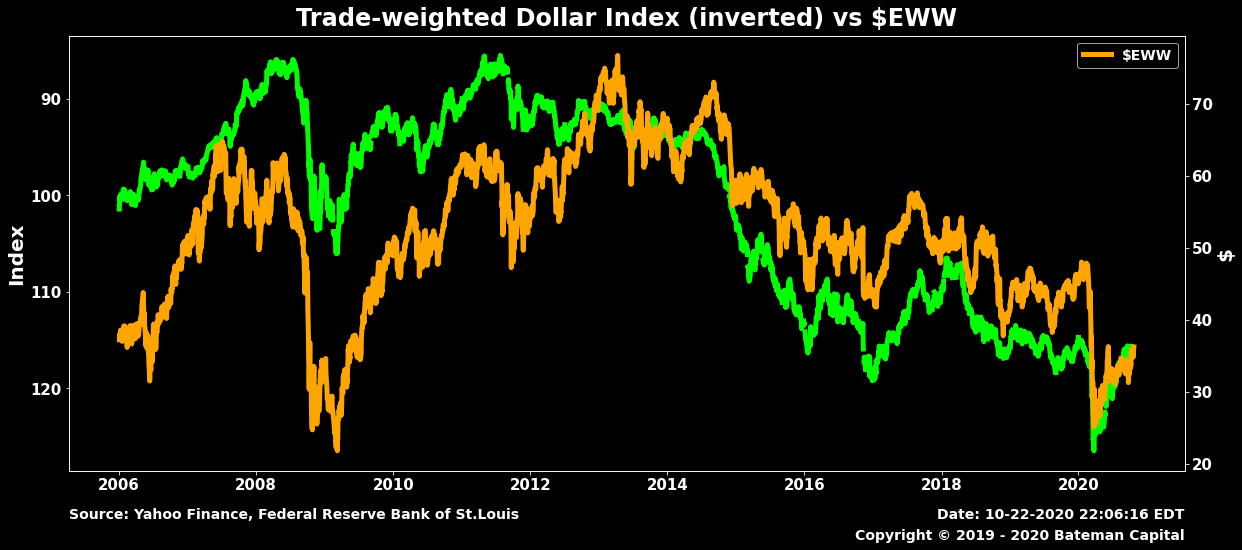

In [70]:
compare_twi('EWW')

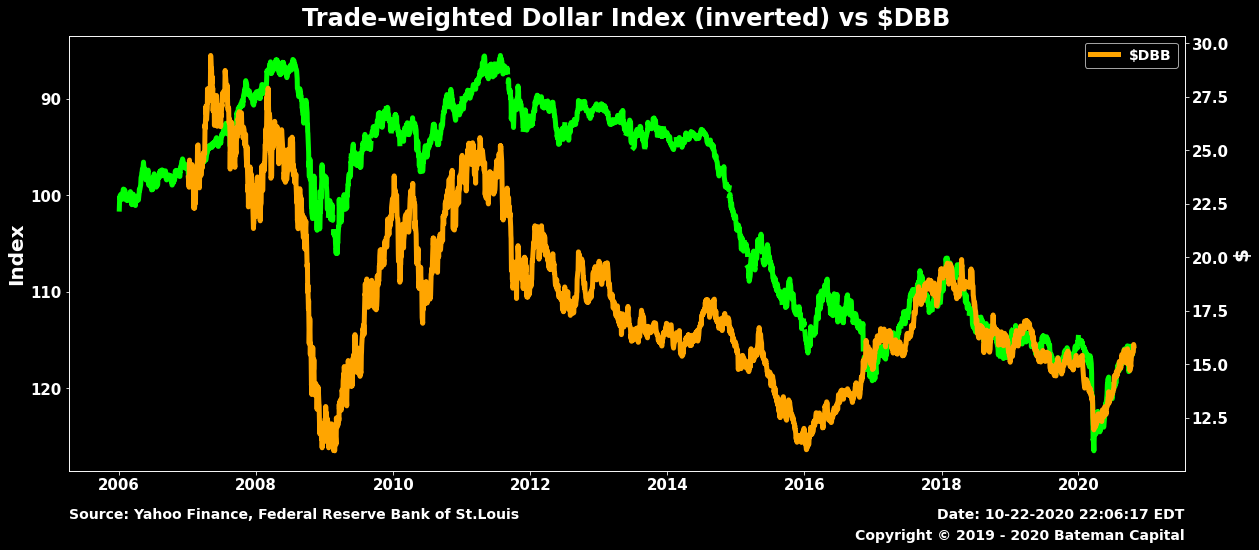

In [71]:
compare_twi('DBB')

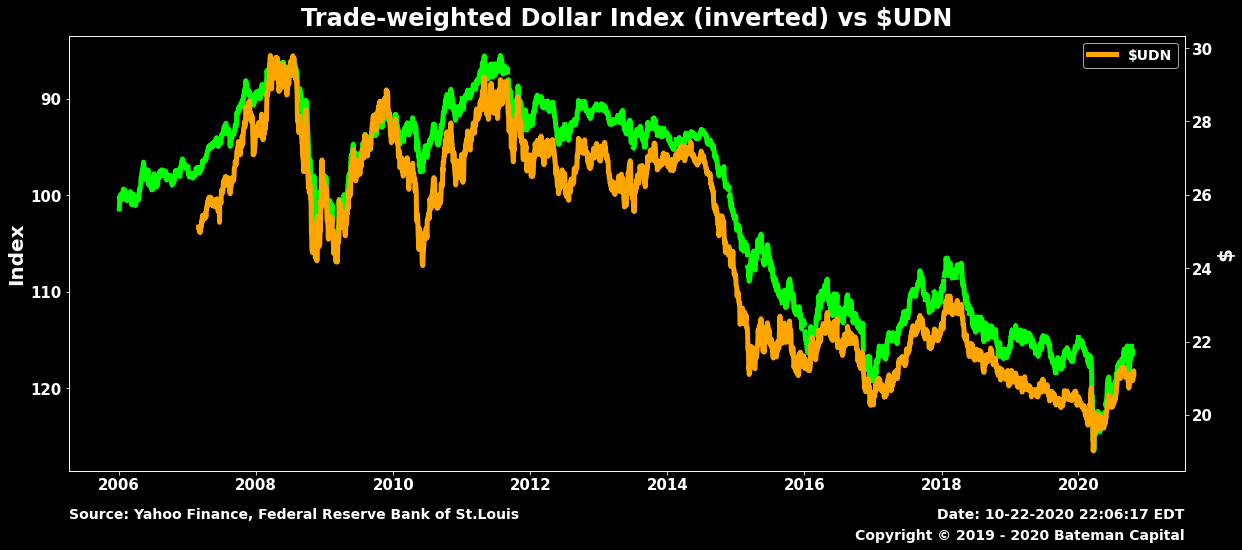

In [72]:
compare_twi('UDN')

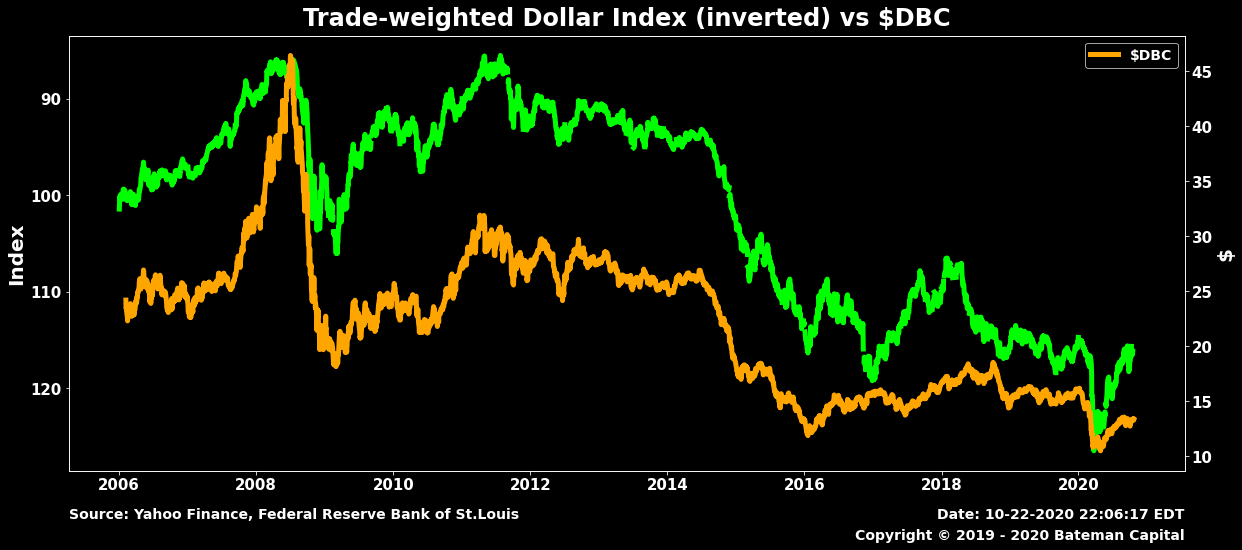

In [73]:
compare_twi('DBC')